# data science lLife cycle
    1. Problem Understandin
    2. Data Collection
    3. Data Cleaning
    4. Feature Engineering
    5. Exploratory Data Analysis - EDA
    6. Model Selection
    7. Model Training
    8. Model Evaluation
    
    
    
    

# 1.Problem Understandin 
Predict whether a Titanic passenger survived or not.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# 2. Data Collection

In [12]:
train_data = pd.read_csv(r"C:\Users\tlakh\OneDrive\سطح المكتب\data\train.csv")
test_data = pd.read_csv(r"C:\Users\tlakh\OneDrive\سطح المكتب\data\test.csv")

In [14]:
# to print first five rows of train data
train_data.head()
# train_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# to print first five rows of test data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
train_data.shape

(891, 12)

In [30]:
test_data.shape

(418, 11)

## Data visualization and Analysis¶
  - missing data for each columns (train and test )
  - survived for traing
  - Embarked
  - survived with sex
  - survived for Pclass
  - survived for Embarked

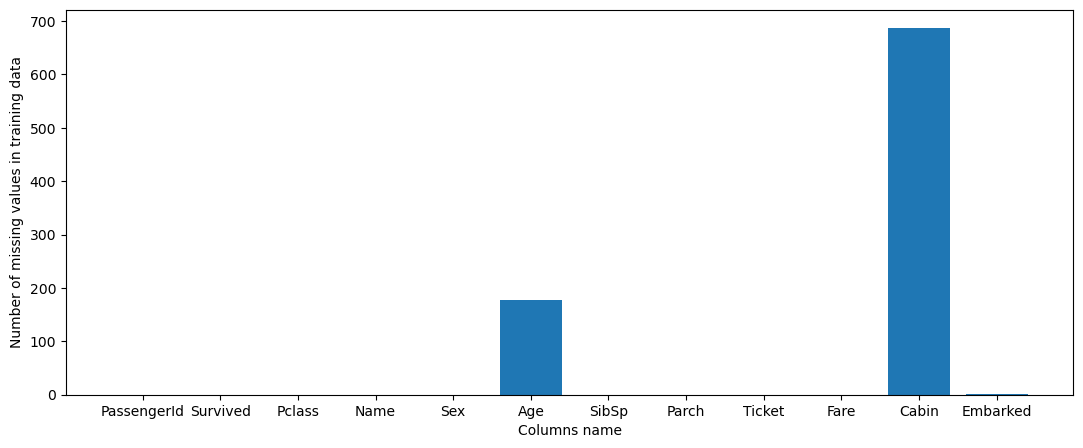

In [32]:
plt.figure(figsize = (13,5))
plt.bar(train_data.columns, train_data.isna().sum())
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in training data")
plt.show()
# from the bar plot of missing value we can conclude that Cabin, Embarked and Cabin column has null value so, we 
# can either drop the entire row or can fill the nan value with some values like mean, meadian. 

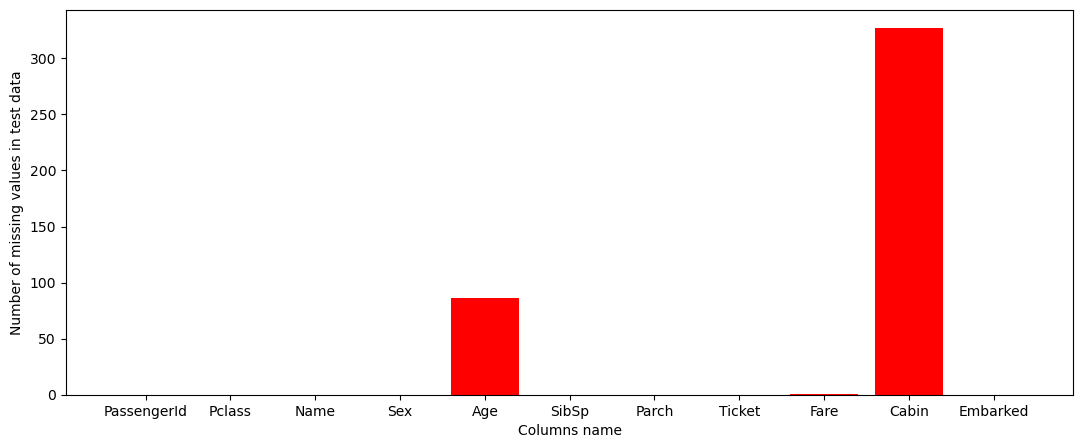

In [33]:
plt.figure(figsize = (13,5))
plt.bar(test_data.columns, test_data.isnull().sum().values, color = 'red')
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in test data")
plt.show()
# similarly we can conclude that Age Cabin and Fare column has nan values . 

<Axes: xlabel='Survived', ylabel='count'>

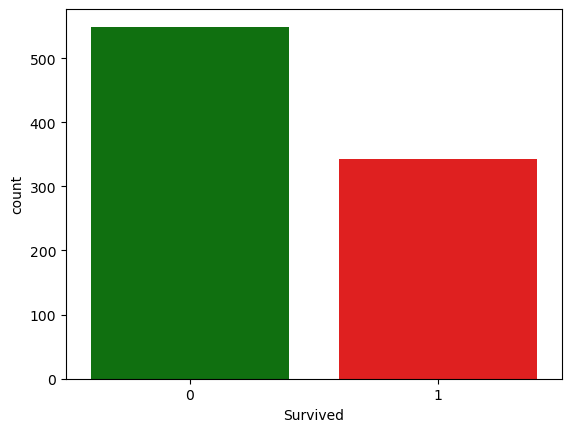

In [34]:
sns.countplot(x='Survived',data=train_data,palette=['g','r'])
# here we plot only for train_data as we donot have Survived column for test data,
# This plot show that around 600 people died while around 300 survived|

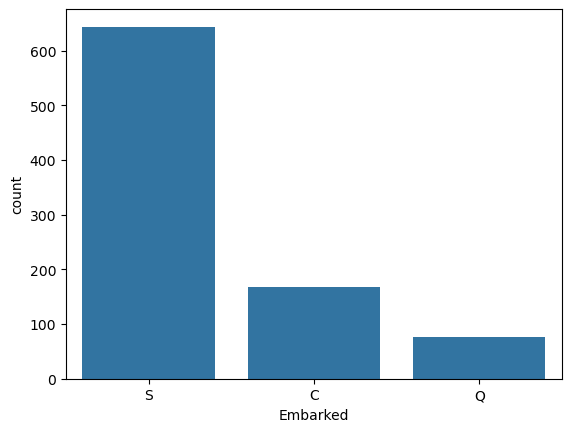

In [35]:
sns.countplot(x= 'Embarked', data = train_data)
plt.show()

[]

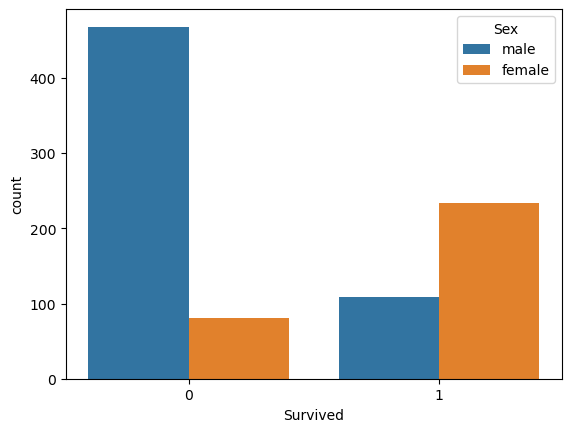

In [36]:
#visualizing whether gender affect the survival rate or not
sns.countplot(x='Survived', hue = 'Sex', data = train_data)
plt.plot()
# the graph clearly show that death rate for male passenger is way more than that for female

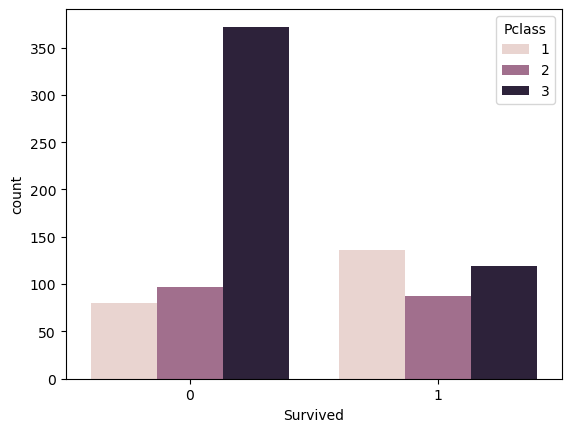

In [37]:
# visualizing whether pclass affect the survial rate or not
sns.countplot(x="Survived", hue = 'Pclass', data = train_data)
plt.show()
# this graph clearly show that people in third class are more likely to die 

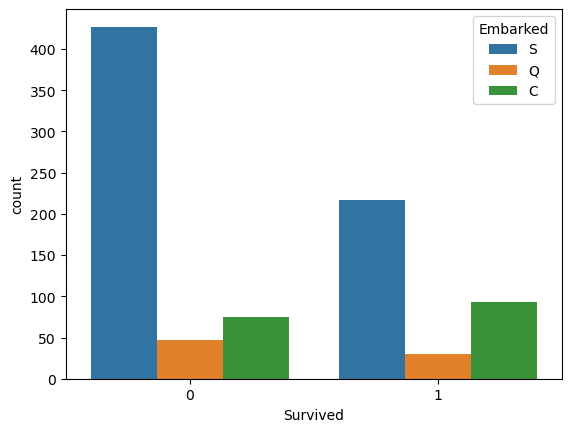

In [38]:
# visualizing whether embarked place affects the survival rate or not
sns.countplot(x='Survived', hue = 'Embarked', data = train_data)
plt.show()

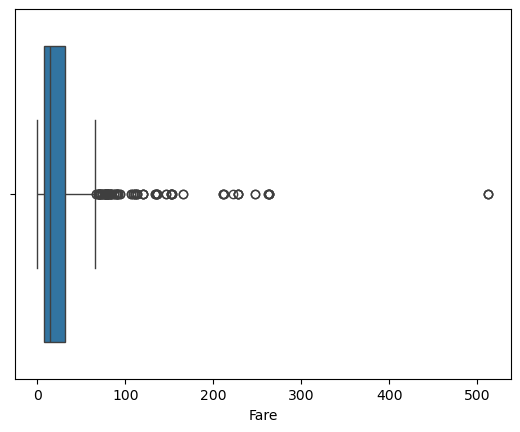

In [39]:
sns.boxplot(x='Fare', data = train_data)
plt.show()
# this shows that there were very few people who payed more than 100

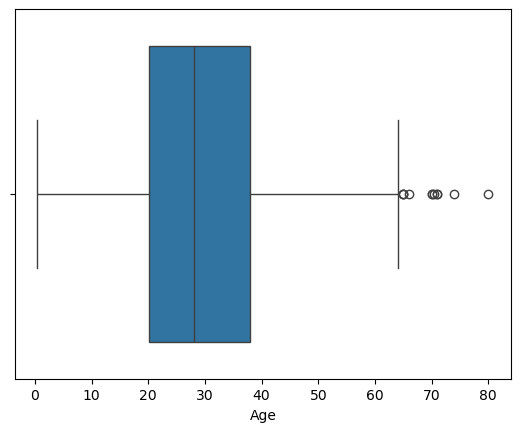

In [40]:
sns.boxplot(x='Age', data = train_data)
plt.show()
# this shows that there were very few people more than 65 years old in training data

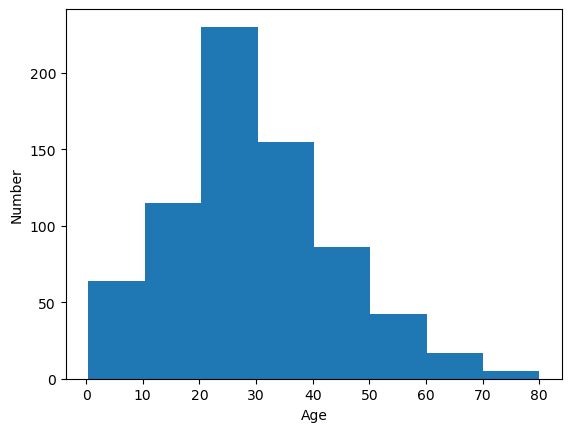

In [41]:
# ploting histogram
# choosing value for bin 
interval = 10
value_for_bin = np.ceil((train_data.Age.max() - train_data.Age.min()) / interval).astype(int)

plt.hist(train_data.Age, bins = value_for_bin)
plt.xlabel("Age")
plt.ylabel("Number")
plt.show()
# this shows that lots of passenger we from age between 20 to 40

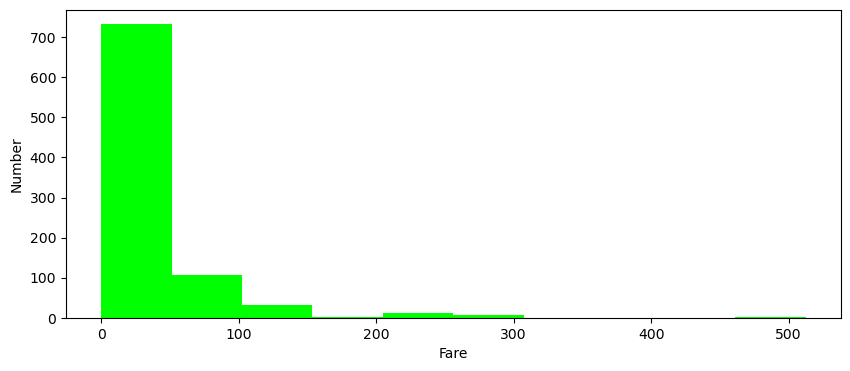

In [42]:
plt.figure(figsize = (10,4))
plt.hist(train_data.Fare, bins = 10, color = 'lime')
plt.xlabel("Fare")
plt.ylabel("Number")
plt.show()
# this shows that around 700 people pay in between 0 and 50

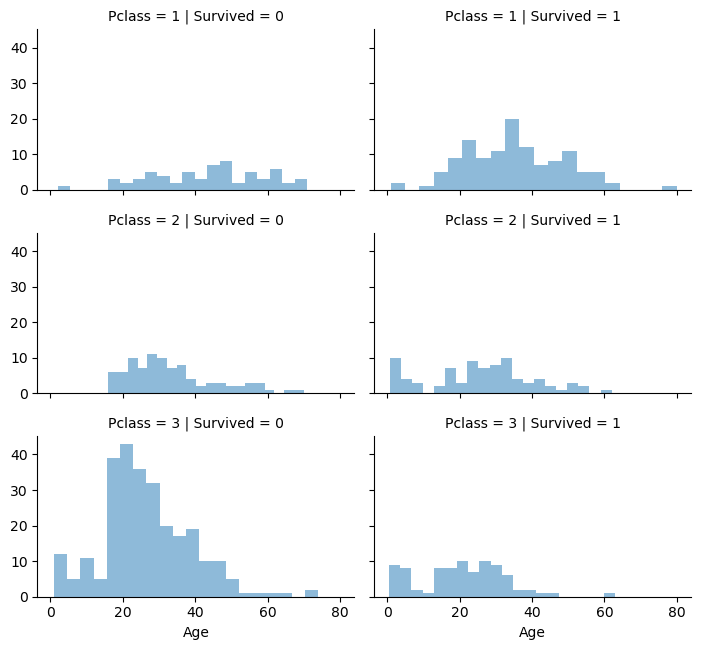

In [43]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

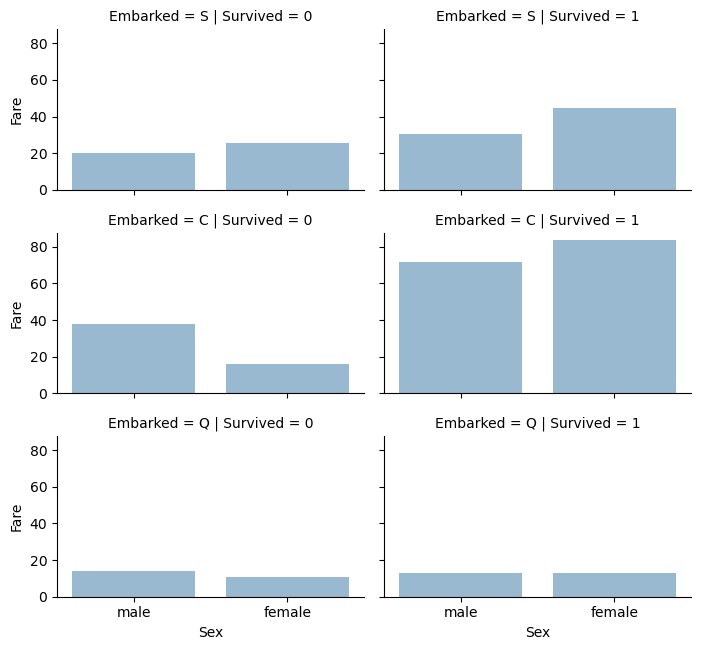

In [44]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', height =2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
plt.show()

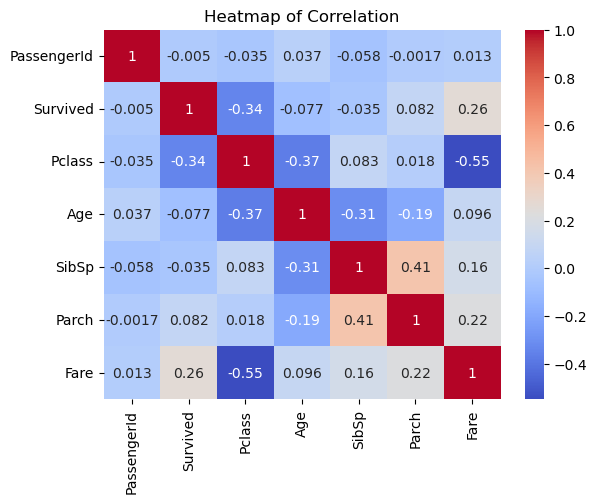

In [45]:
corr_train = train_data.corr(numeric_only=True)
sns.heatmap(corr_train, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation')
plt.show()

# this shows that SibSp and Parch columns are releted , so we can combine this two column to reduce the dimension
# of our data.. this plot only works for columns with numercal data 

## Simple Data Analysis


In [47]:
pd.pivot_table(train_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [48]:
((train_data.groupby(['Sex','Survived']).Survived.count() * 100) / train_data.groupby('Sex').Survived.count())

# this shows that female have around 74% chance of survival while male have around 81% chance of death

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

In [49]:
(train_data.groupby(['Pclass','Survived']).Survived.count() * 100) / train_data.groupby('Pclass').Survived.count()


# this shows that people belonging to third class are likely to die while people in class one are likely to survive

Pclass  Survived
1       0           37.037037
        1           62.962963
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

In [50]:
(train_data.groupby(['Embarked','Survived']).Survived.count() * 100) / train_data.groupby('Embarked').Survived.count()

# this shows that people who embarked from Southampton are likely to die

Embarked  Survived
C         0           44.642857
          1           55.357143
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: Survived, dtype: float64

## Dealing with the Missing values

In [52]:
# before filling the missing values, let's drop Cabin column from both data.
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)

In [53]:
combined_data = [train_data, test_data]
for data in combined_data:
    print(data.isnull().sum())
    print('*' * 20)
      

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
********************
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64
********************


In [54]:
# filling the nan values fo Age and fare column with the mean while Embarked column with most_frequent value
for data in combined_data:
    data.Age.fillna(data.Age.mean(), inplace = True)
    data.Fare.fillna(data.Fare.mean(), inplace = True)
    
# from visualization we know that Southamptom is most frequent Embarked place so, filling the missing value 
# with 'S'
train_data.Embarked.fillna('S', inplace = True)

# we simply can use SimpleImputer class form the sklearn to deal with the missing value
# from sklearn.impute import SimpleImputer
# impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# train_data[['Age']] = impute.fit_transform(train_data[['Age']])

In [55]:
columns_to_drop = ['PassengerId','Ticket']
train_data.drop(columns_to_drop, axis = 1, inplace = True)
test_data.drop(columns_to_drop[1], axis = 1, inplace = True)

## Converting a categorical feature
   - Let's start by converting Sex feature to categorical female=1 and male=0¶


In [57]:
def change_gender(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1
train_data.Sex = train_data.Sex.apply(change_gender)
test_data.Sex = test_data.Sex.apply(change_gender)
# we simply can use mapfunction to change the gender
# train_data.Sex = train_data.Sex.map({'female':1, 'male':0})

In [58]:
# using map funcion to change the Embarked column S = 1, C = 2, Q = 0
change = {'S':1,'C':2,'Q':0}
train_data.Embarked = train_data.Embarked.map(change)
test_data.Embarked = test_data.Embarked.map(change)


## Feature Extraction
 - while visualizing the correlation heatmap we came to know that Sibsp and Parch columns were closely related so lets created new column called Alone using this two columns -------> 1 = Alone , 0 = not Alone


In [60]:
train_data['Alone'] = train_data.SibSp + train_data.Parch
test_data['Alone'] = test_data.SibSp + test_data.Parch

train_data.Alone = train_data.Alone.apply(lambda x: 1 if x == 0 else 0)
test_data.Alone = test_data.Alone.apply(lambda x: 1 if x == 0 else 0)

In [62]:
# now lets drop SibSp and Parch column for both training and testing data
train_data.drop(['SibSp','Parch'], axis = 1, inplace = True)
test_data.drop(['SibSp','Parch'], axis = 1, inplace = True )

## Creating new feature Title extracting from existing feature Name


In [64]:
train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False).unique().size
# there are total 17 unique title

17

In [65]:
# lets create the Title feature which contain the title of the passenger and drop Name column
for data in combined_data:
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand = False)
    data.drop('Name', axis = 1, inplace = True)

In [66]:
train_data.Title.value_counts()


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [78]:
test_data.Title.unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [81]:
#lets replace least occuring title in the data with rare
least_occuring = [ 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess','Dona',
       'Jonkheer']
for data in combined_data:
    data.Title = data.Title.replace(least_occuring, 'Rare')

In [82]:
# lets perform title mapping in order to change to ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in combined_data:
    data['Title'] = data['Title'].map(title_mapping)

## Binning Age and Fare columns¶


In [85]:
for dataset in combined_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [86]:
for data in combined_data:
    data.loc[data['Fare'] < 30, 'Fare'] = 1
    data.loc[(data['Fare'] >= 30) & (data['Fare'] < 50),'Fare'] = 2
    data.loc[(data['Fare'] >= 50) & (data['Fare'] < 100),'Fare'] = 3
    data.loc[(data['Fare'] >= 100),'Fare'] = 4

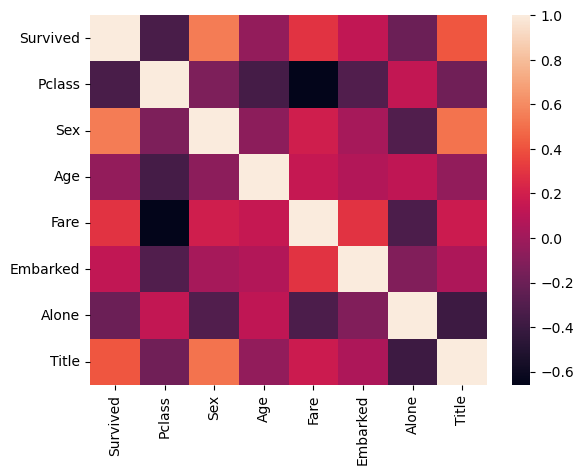

In [87]:
corr_train = train_data.corr()
sns.heatmap(corr_train)
plt.show()

## preparing training and testing data¶


In [89]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test = test_data.drop("PassengerId", axis = 1)
print("shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of x_test",X_test.shape)

shape of X_train (891, 7)
Shape of Y_train (891,)
Shape of x_test (418, 7)


## Import necessary libraries¶



In [93]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,recall_score ,f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')
#plt.style.use('fivethirtyeight')  # ✅ صحيح

In [94]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,0,1.0,1.0,1,0,1
1,1,1,1,2.0,3.0,2,0,3
2,1,3,1,1.0,1.0,1,1,2
3,1,1,1,2.0,3.0,1,0,3
4,0,3,0,2.0,1.0,1,1,1


In [95]:

x = train_data.drop(["Survived", "Title"], axis=1)

y = train_data["Survived"]


In [96]:
# The dataset was then split into training and testing subsets using an 80/20 ratio to ensure unbiased model evaluation:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)


In [97]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier()


In [98]:
columns = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']

result1 = []
result2 = []
result3 = []

In [99]:
# اختصار لكل الاكواد السايقة 
def cal(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    accuracy = accuracy_score(pre,y_test)
    recall = recall_score(pre,y_test)
    f1 = f1_score(pre,y_test)

    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    
    print(model)
    print('accuracy : ',accuracy ,', recall :',recall ,', f1 :',f1)


cal(model1)


LogisticRegression()
accuracy :  0.776536312849162 , recall : 0.703125 , f1 : 0.6923076923076923


In [100]:
cal(model2)

SVC()
accuracy :  0.7932960893854749 , recall : 0.8222222222222222 , f1 : 0.6666666666666666


In [101]:
cal(model3)


RandomForestClassifier()
accuracy :  0.8268156424581006 , recall : 0.7777777777777778 , f1 : 0.7596899224806202


In [103]:
cal(model4)


GradientBoostingClassifier()
accuracy :  0.8379888268156425 , recall : 0.8245614035087719 , f1 : 0.7642276422764228


In [104]:
FinalResult = pd.DataFrame({'Algorithm':columns ,'accuracy':result1,'recall':result2,'f1':result3})
FinalResult

,Algorithm,accuracy,recall,f1
0,LogisticRegression,0.776536,0.703125,0.692308
1,SVC,0.793296,0.822222,0.666667
2,RandomForestClassifier,0.826816,0.777778,0.759690
3,GradientBoostingClassifier,0.837989,0.824561,0.764228


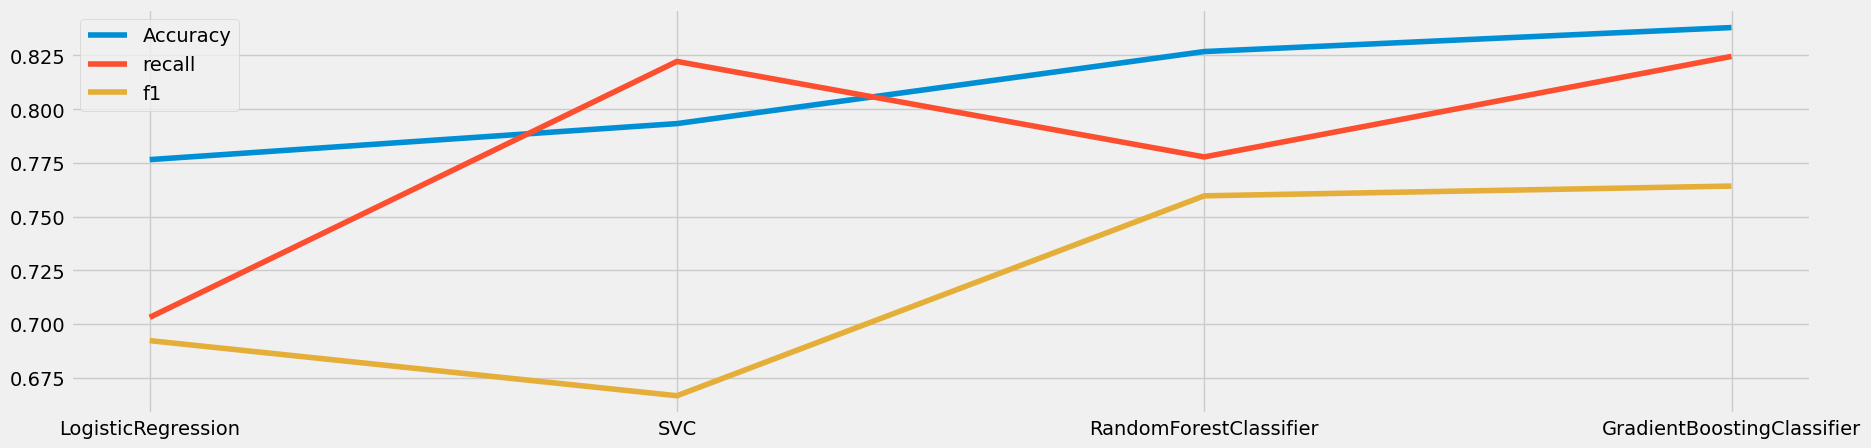

In [105]:
fig,ax=plt.subplots(figsize=(20,5))

plt.plot(FinalResult.Algorithm,result1 ,label='Accuracy')
plt.plot(FinalResult.Algorithm,result2 ,label='recall')
plt.plot(FinalResult.Algorithm,result3 ,label='f1')

plt.legend()
plt.show()

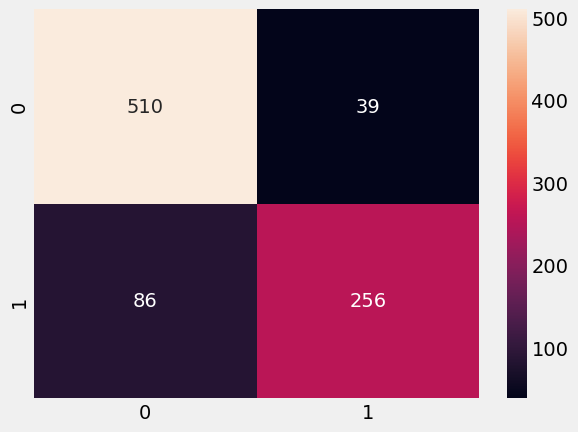

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_train, Y_train)
Y_pred_rand = model.predict(X_train)

matrix = confusion_matrix(Y_train, Y_pred_rand)
sns.heatmap(matrix, annot=True, fmt='g')
plt.show()
